In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.transforms import Bbox
plt.style.use('ggplot')

In [2]:
# ggplot style C1=#348ABD
c1 = np.array([52,138,189]) / 255

rgb = lambda x: np.array(matplotlib.colors.to_rgb(x))

## Figure 2

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


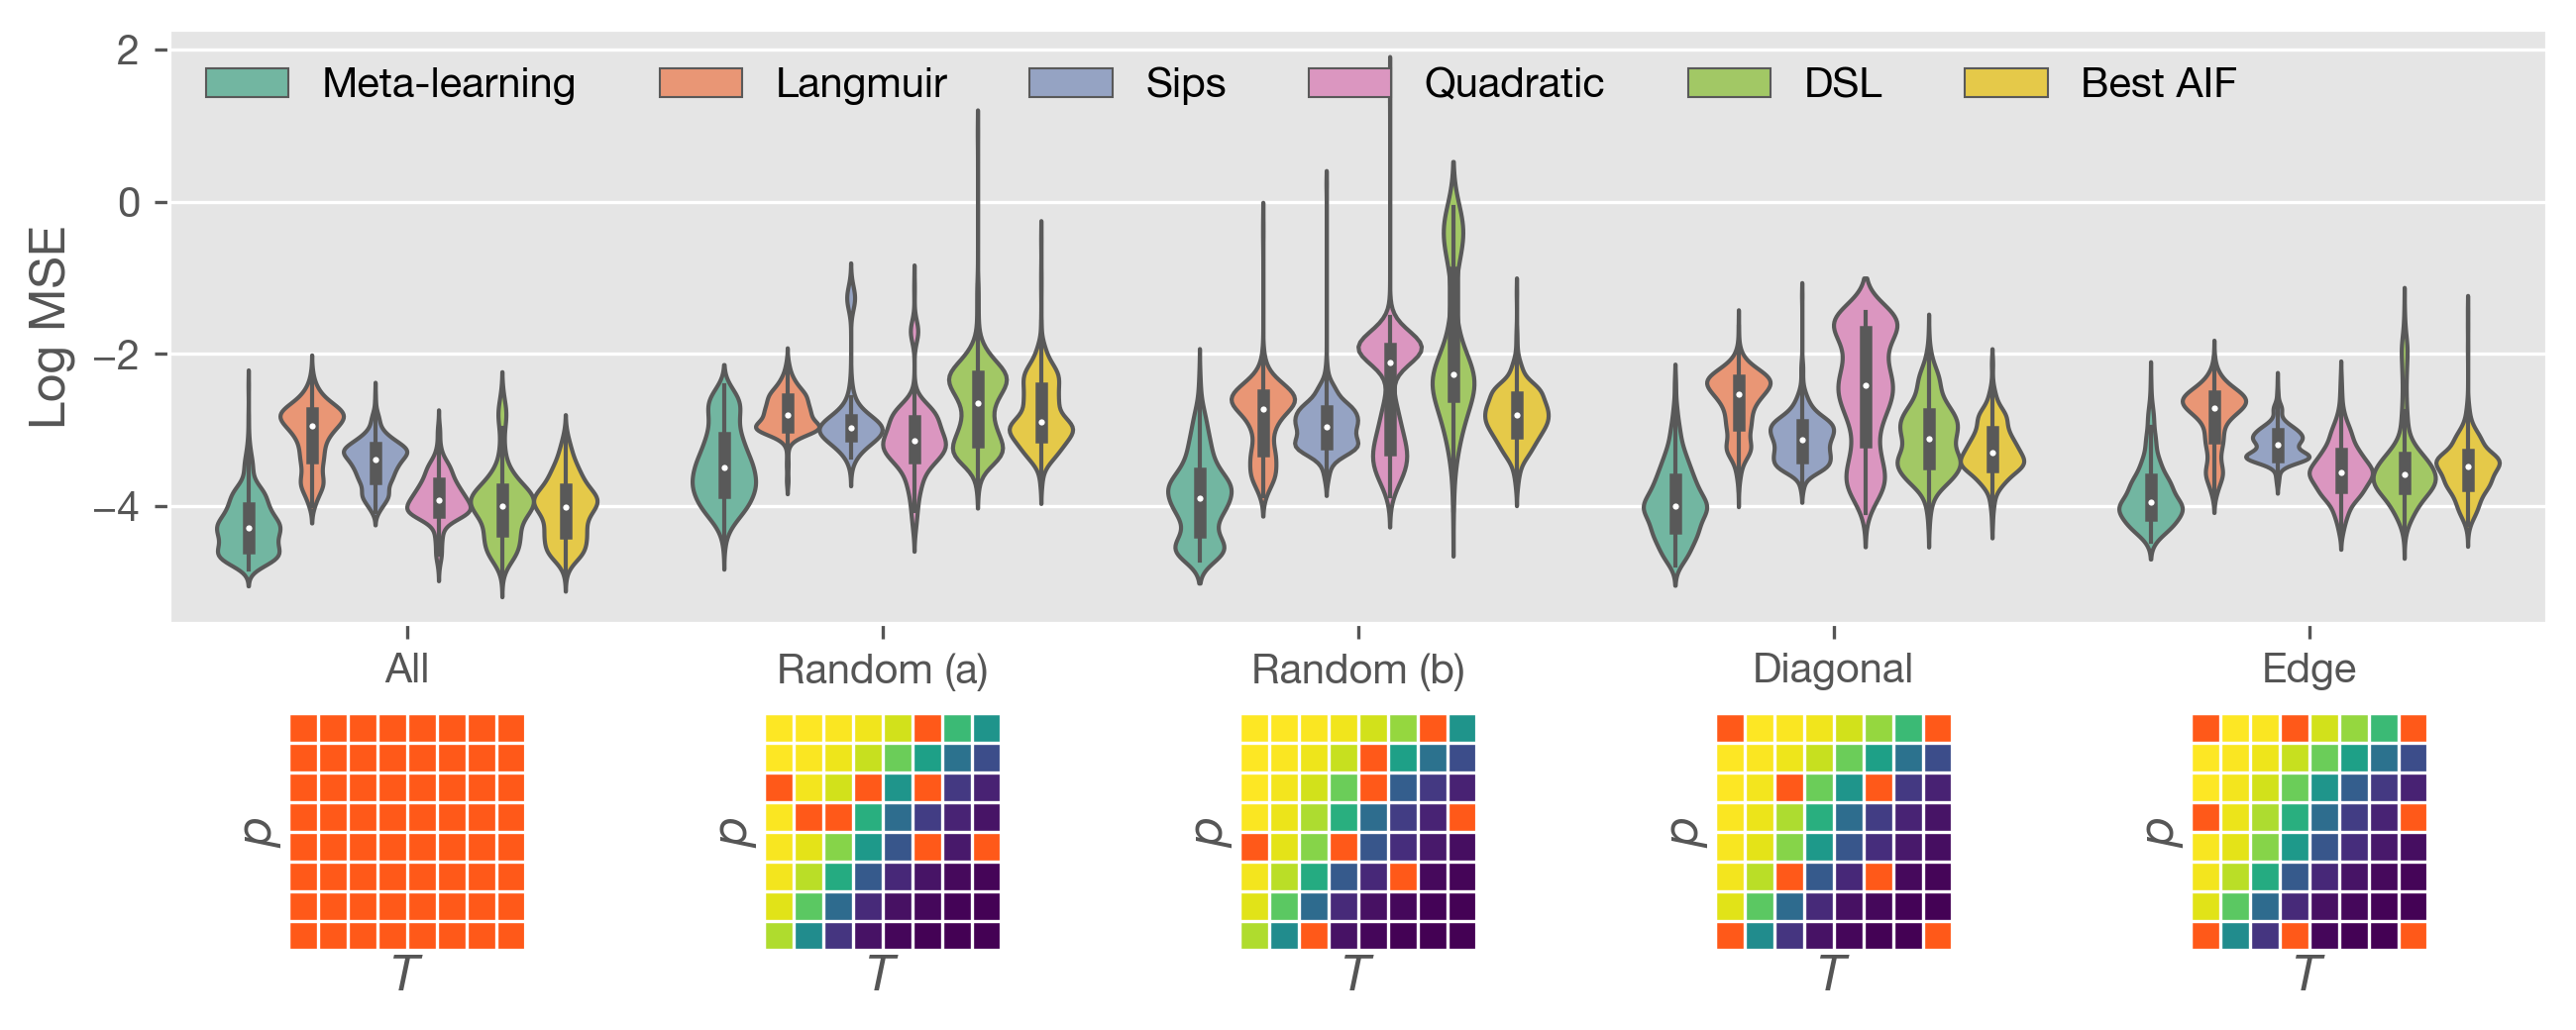

In [3]:
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition, mark_inset

title_mode = ["All", "Random (a)", "Random (b)", "Diagonal", "Edge"]
titles = ['Meta-learning', 'Langmuir', 'Sips', 'Quadratic', 'DSL', 'Best AIF']
names = ['nn', 'langmuir', 'sips', 'quadratic', 'dslangmuir','best']
columns = ['Dataset', 'Sampling', 'Model', 'Log MSE']
modes = ['regular', 'random8', 'random8_1', 'diagonal', 'edge']
rows = []
for subtitle, mode in zip(title_mode, modes):
    for dataset in ['iza', 'pcod', 'hcp', 'mof']:
        fits_nn = np.loadtxt('results/%s/nn-%s.csv' % (dataset, mode), delimiter=',')[:, -1]
        fits_isotherm = np.loadtxt('results/%s/best-fit-%s.csv' % (dataset, mode), delimiter=',')
        for x in fits_nn:
            rows.append([dataset.upper(), subtitle, "Meta-learning", np.log10(x)])
        for i, name in enumerate(names[1:-1]):
            data = np.loadtxt('results/%s/%s-fit-%s.csv' % (dataset, name, mode), delimiter=',')[:, -1]
            for x in data:
                rows.append([dataset.upper(), subtitle, titles[i + 1], np.log10(x)])
        for x in fits_isotherm:
            rows.append([dataset.upper(), subtitle, "Best AIF", np.log10(x)])
df = pd.DataFrame(rows, columns=columns)


fig = plt.figure(figsize=(8, 2), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])
plot = sns.violinplot(ax=ax, data=df, 
                   x="Sampling", y="Log MSE", hue="Model", split=False, 
                   palette="Set2", linewidth=1, scale='count')
ax.set_xlabel("")
    
data_example = np.load("../data/iza/iza_hydrogen.npy")[169, 0]
cm = plt.get_cmap('viridis')
np.random.seed(0)
ind_all = np.arange(64)
ind_rand = np.array([45, 29, 43, 61, 34, 33, 31, 40])
ind_rand2 = np.array([[24, 39, 52, 27, 44,  2, 21, 62]])
ind_diag = np.array([7, 0, 63, 56, 21, 18, 45, 42])
ind_edge = np.array([7, 0, 63, 56, 3, 39, 59, 32])
indices = [ind_all, ind_rand, ind_rand2, ind_diag, ind_edge]
maskcolor = np.array([1, 0.35, 0.1, 1])
a = 0.6
ax_orig = ax
for i in range(len(indices)):
    # set inset axes
    ip = InsetPosition(ax_orig, [0.2 * i - 0.1, -0.55, 0.4, 0.4])
    ax = fig.add_axes([0,0,1,1], label=i)
    ax.set_axes_locator(ip)
    ax.set_xticks(np.arange(9)-0.5)
    ax.set_yticks(np.arange(9)-0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis="both", which="both", bottom=False, left=False)
    ax.set_xlabel("$T$", labelpad=-6)
    ax.set_ylabel("$p$", labelpad=-6)
    img = cm(data_example)
    img[indices[i]] = maskcolor
    ax.imshow(img.reshape(8, 8, -1), origin='lower') 

plot.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=6, fontsize=10, frameon=False)
#plt.savefig('figure-2.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Figure 3

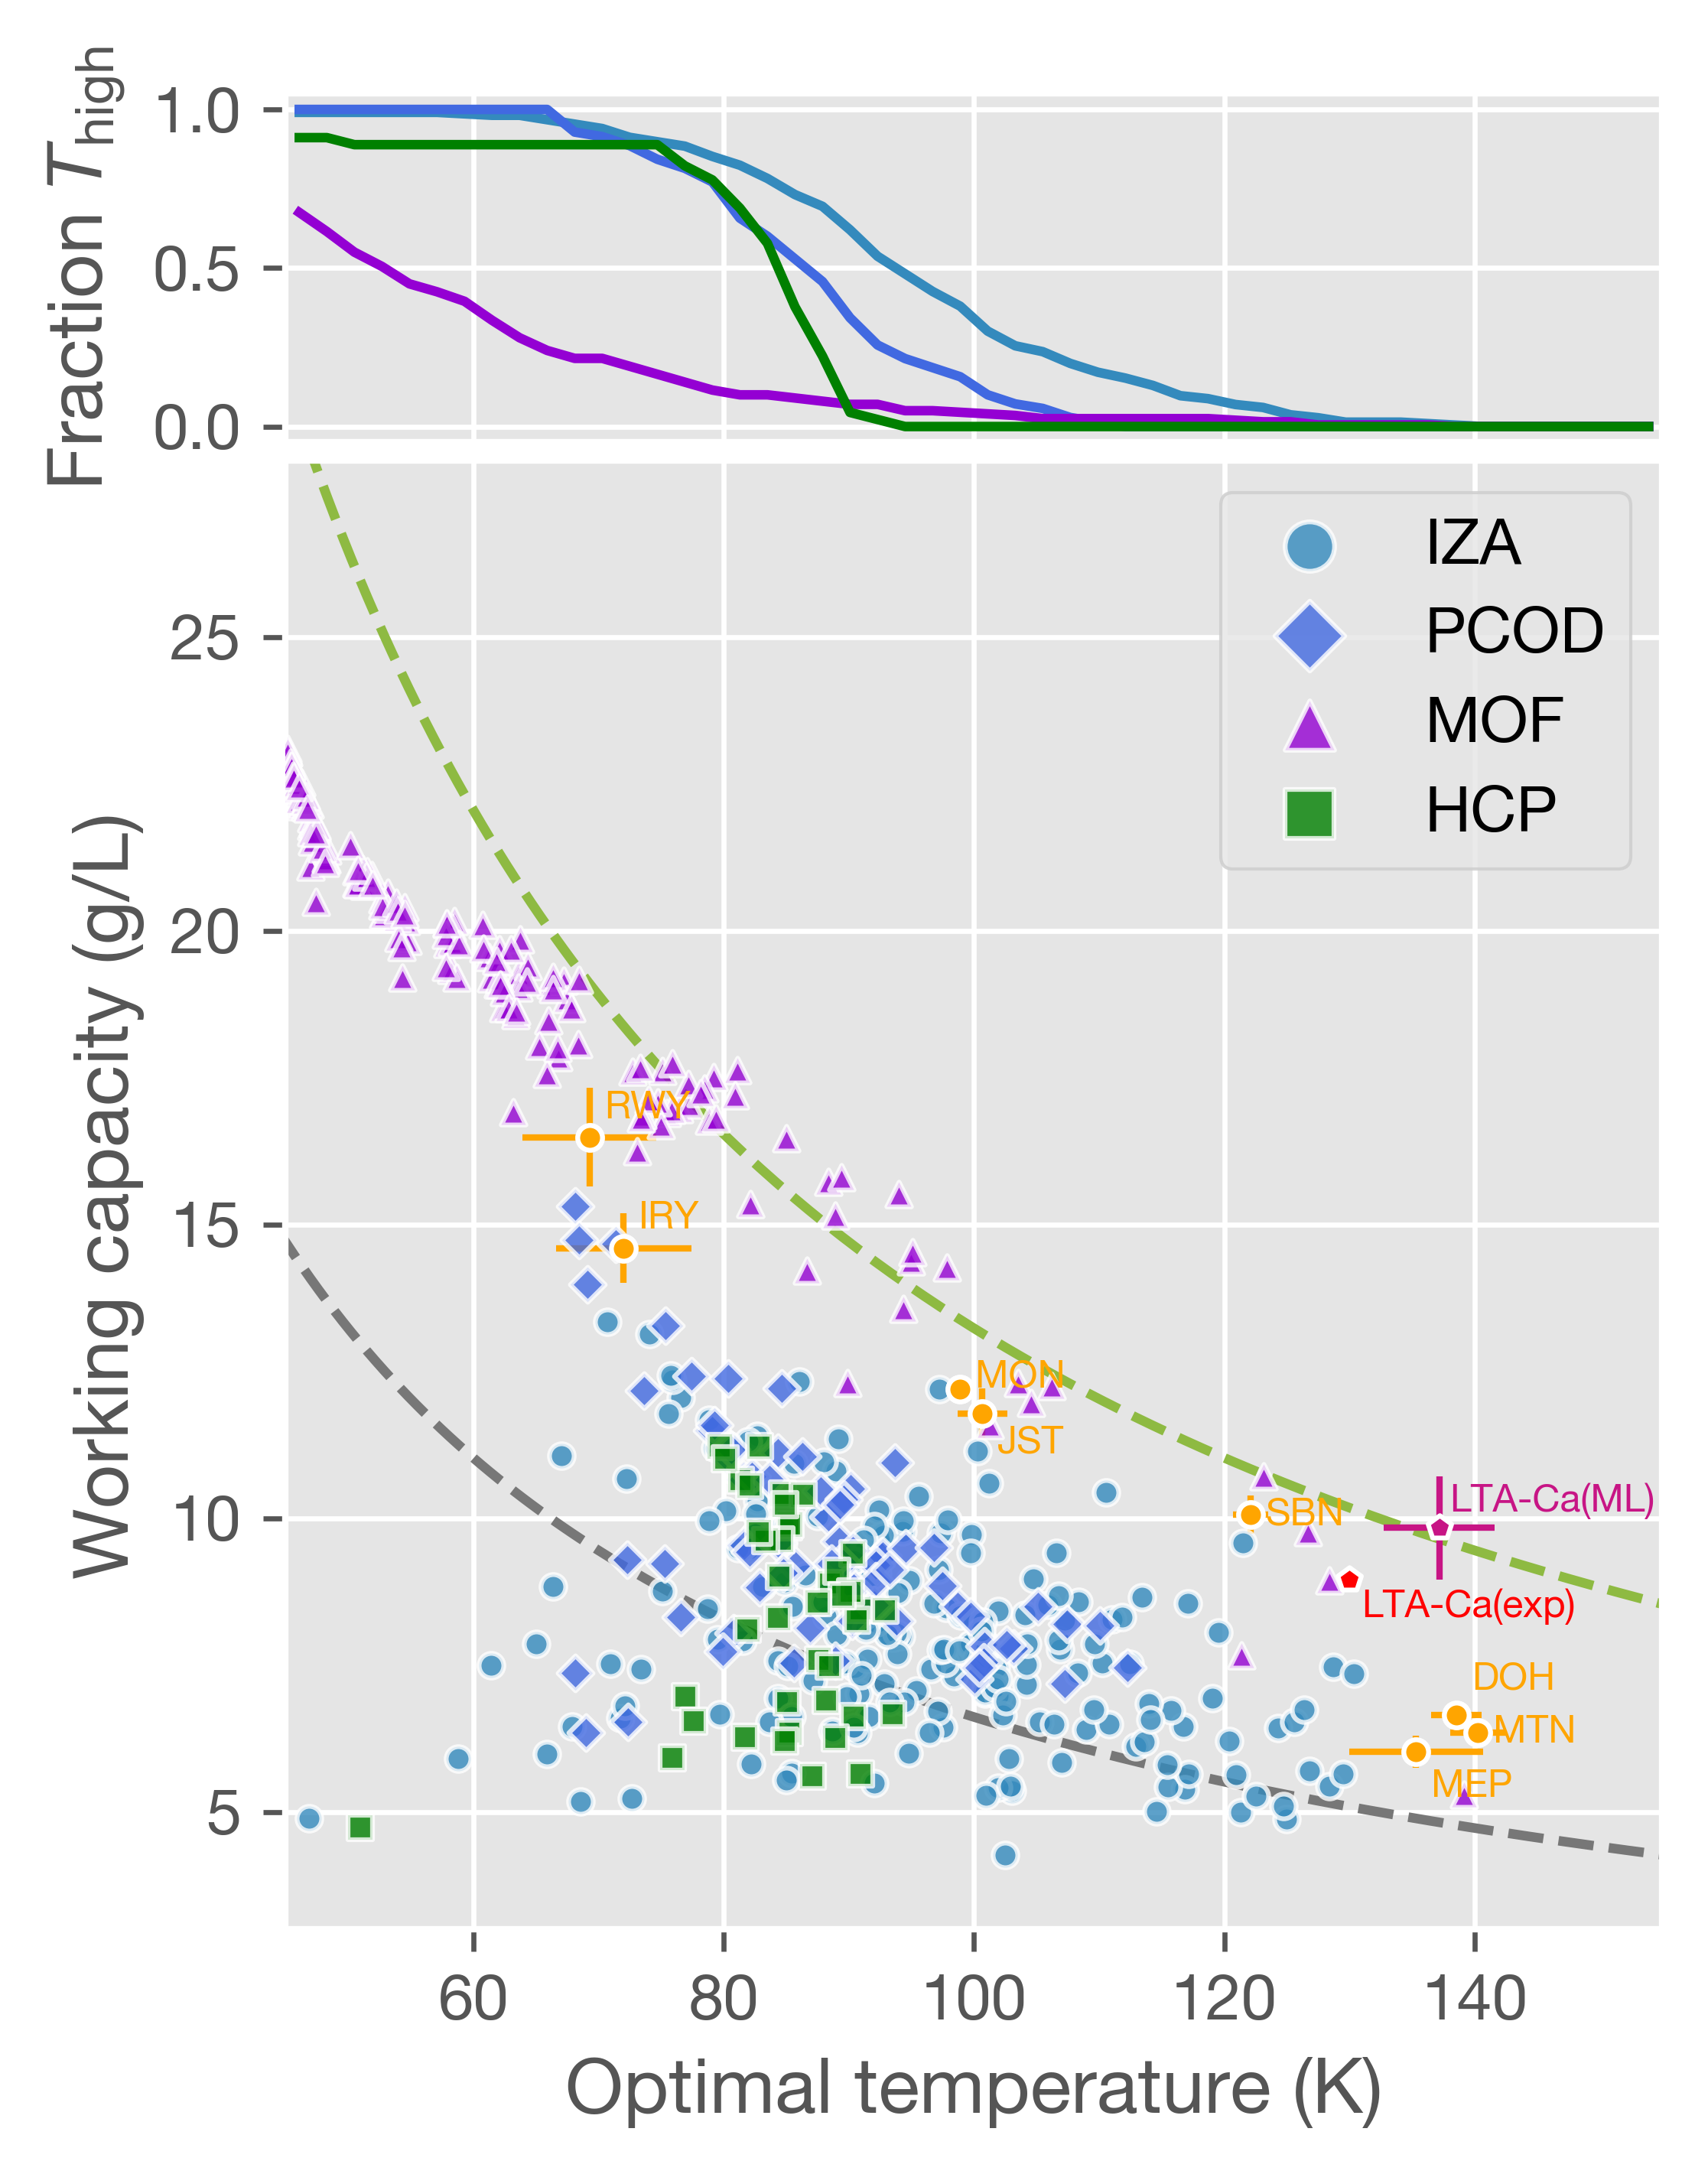

In [4]:
df_iza = pd.read_csv("results/iza/temps-p02.71-p30-f0.7-swing0.csv", index_col=0, dtype={'Zeolite': str})
df_pcod = pd.read_csv("results/pcod/temps-p02.71-p30-f0.7-swing0.csv", index_col=0, dtype={'Zeolite': str})
df_mof = pd.read_csv("results/mof/temps-p02.71-p30-f0.7-swing0.csv", index_col=0, dtype={'Zeolite': str})
df_hcp = pd.read_csv("results/hcp/temps-p02.71-p30-f0.7-swing0.csv", index_col=0, dtype={'Zeolite': str})

R = 0.08314
eos = lambda p, V, T: p * V / R / T
p1 = 30
p0 = 2.71

ylim = [3, 28]
xlim = [45, 155]

colors = [c1, 
          rgb('royalblue'), 
          rgb('darkviolet'),
          rgb('green'),
         ]

markers = ['o', 'D', '^', 's']

fig = plt.figure(figsize=(3, 4), dpi=600)
ax_main = fig.add_axes([0, 0, 1, 0.8], zorder=20)
ax_sidex = fig.add_axes([0, 0.81, 1, 0.19], zorder=10)
ax_sidex.set_xlim(xlim)
ax_sidex.set_xticklabels([])
ax_sidex.xaxis.set_ticks_position('none')
ax_sidex.set_ylabel('Fraction $T_{\mathrm{high}}$')
ax_sidex.set_yticks([0.0, 0.5, 1.0])
ax_sidex.set_yticklabels([0.0, 0.5, 1.0])


size = 15
lw = 0.75
alpha = 0.8

lines = []

for i, df in enumerate([df_iza, df_pcod, df_mof, df_hcp]):
    x = df['Optimal temperature (K)'].values
    y = df['Tank capacity (mol)'].values
    x_err = df['Optimal temperature error (K)'].values
    y_err = df['Tank capacity error (mol)'].values
    name = df['Zeolite'].values
    temp_hist, bins = np.histogram(x, bins=50, range=(xlim[0], xlim[1]))
    # convert bin edges to center of bins as x-coordinates
    bins = (bins[1:] + bins[:-1]) / 2
    # normalized histogram
    temp_hist = temp_hist / np.sum(temp_hist)
    ax_sidex.plot(bins, 1 - np.cumsum(temp_hist), color=colors[i])
    mask = df['Optimal temperature (K)'] >= 45.1
    lines.append(ax_main.scatter(x[mask], y[mask], color=colors[i], marker=markers[i], 
                                 edgecolor="1", zorder=10, s=size, linewidth=lw, alpha=alpha))
    if i == 0:
        validated = ['RWY-0', 'IRY-0', 'MON-0', 'JST-0', 'SBN-0', 'MEP-0', 'DOH-0', 'MTN-0']
        offsets = [0.5, 0.5, 0.2, -0.5, 0, -0.6, 0.6, 0]
        for i in range(len(name)):
            y_gas = (eos(p1, 2.0158, x[i]) - eos(p0, 2.0158, x[i]))
            if name[i] in validated:
                ax_main.text(x[i]+1.2, y[i]+offsets[validated.index(name[i])], name[i][:-2], 
                             fontsize=6, color='orange', rotation=0,
                             horizontalalignment='left',
                             verticalalignment='center',zorder=100)
                ax_main.scatter(x[i], y[i], color='orange', edgecolor="1", s=size, linewidth=lw, zorder=100)
                ax_main.errorbar(x[i], y[i], xerr=x_err[i], yerr=y_err[i], color="orange", marker='', ls='', linewidth=1)
                
ax_main.scatter(130, 8.958926, color='red', edgecolor="1", s=size, linewidth=lw, zorder=120, marker='p')
ax_main.text(131, 8.5, "LTA-Ca(exp)",
              fontsize=6, color='red', rotation=0,
              horizontalalignment='left',
              verticalalignment='center', zorder=100)

ax_main.scatter(137.1875,9.838624,color='mediumvioletred', edgecolor="1", s=size, linewidth=lw, zorder=120, marker='p')
ax_main.errorbar(137.1875,9.838624,xerr=4.4273,yerr=0.8802, color="mediumvioletred", marker='', 
                                 ls='', linewidth=1, zorder=100)

ax_main.text(138, 10.3, "LTA-Ca(ML)",
              fontsize=6, color='mediumvioletred', rotation=0,
              horizontalalignment='left',
              verticalalignment='center', zorder=100)

x_line = np.linspace(30,160,200)
y_line = (eos(p1, 2.0158, x_line) - eos(p0, 2.0158, x_line))
ax_main.plot(x_line, y_line, color='C3', ls='--')
ax_main.plot(x_line, 2*y_line, color='C5', ls='--')
ax_main.set_xlim(xlim)
ax_main.set_ylim(ylim)
ax_main.set_xlabel('Optimal temperature (K)')
ax_main.set_ylabel('Working capacity (g/L)')
ax_main.legend(lines, ['IZA', 'PCOD', 'MOF', 'HCP'], loc='best', markerscale=2)
#plt.savefig('figure-3.pdf', format='pdf', bbox_inches='tight')
plt.show()

## Figure 4 and S5
Use `si = True` or `si = False` to switch between two sets of plots.

Also prints $T_\mathrm{val, sim}$ in **Table S2.**

RWY [64.2 70.0 75.0] [16.93712405852228 16.84468236168784 16.475856212526153]
MON [100.0 95.0 105.0] [11.750310522906616 11.627420936374426 11.389417851405957]
SBN [120.0 115.0 125.0] [10.367233876898801 10.278514938519152 10.137309173481636]
MTN [145.0 140.0 150.0] [6.0816689658745124 6.05991627157263 6.0214326603518975]


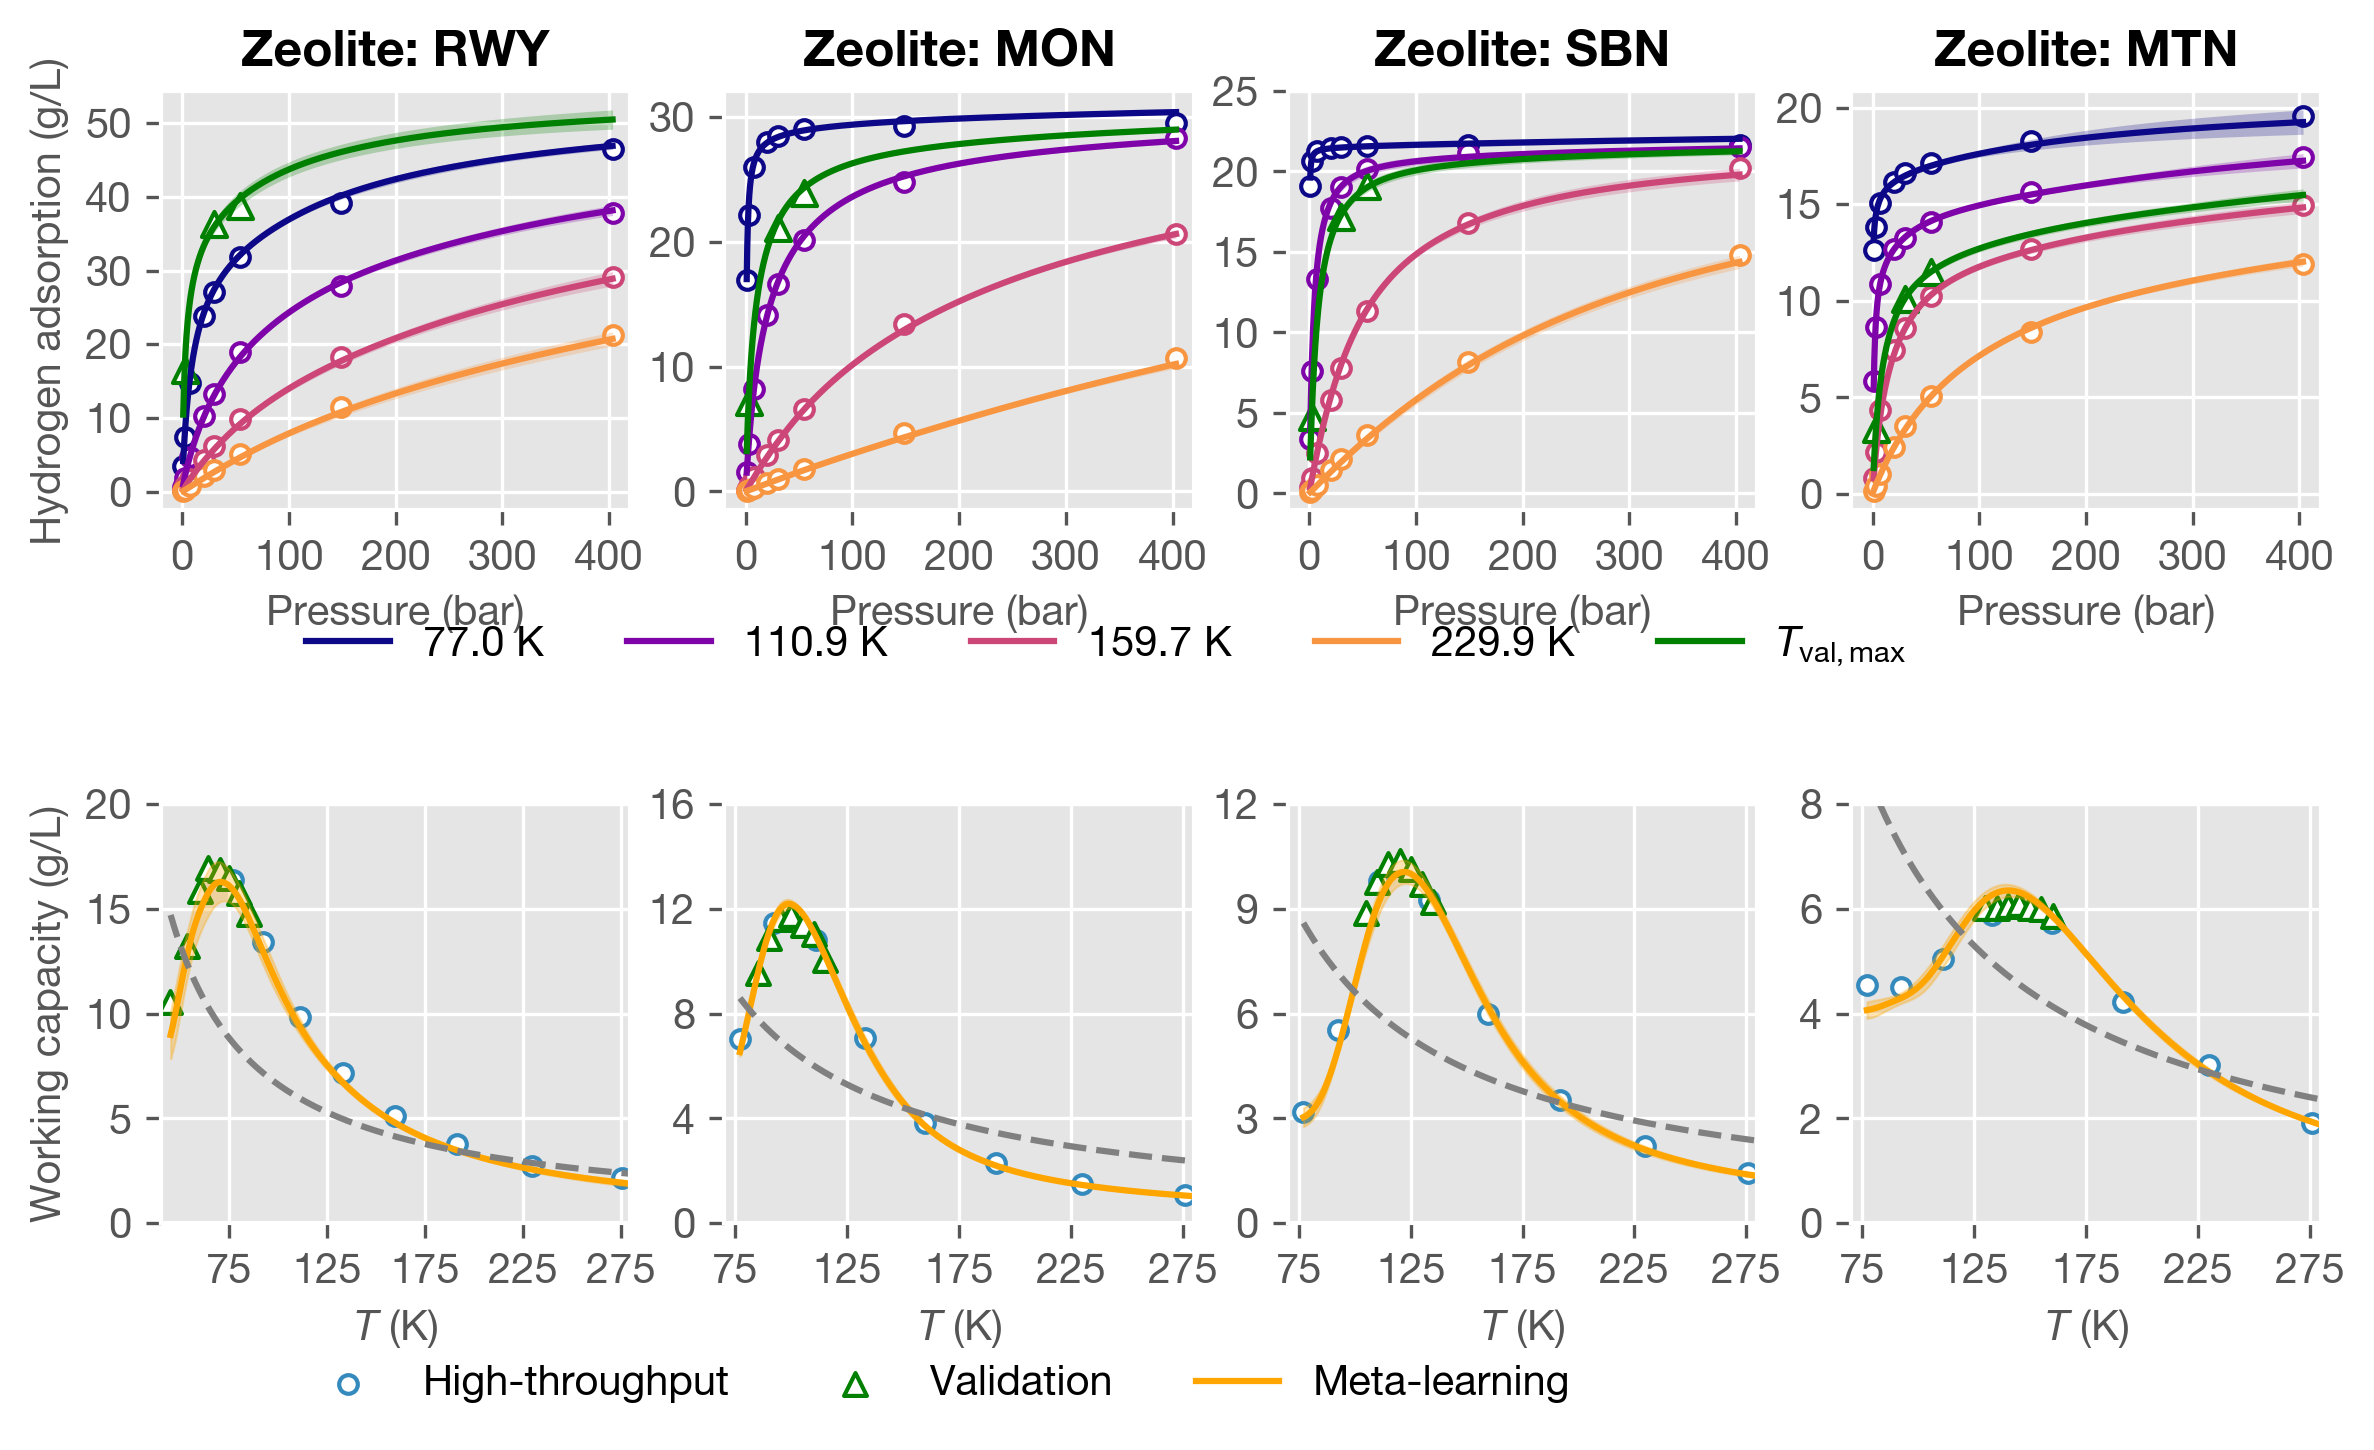

In [5]:
si = False

def get_capacity(df, key, p0, p1, e):
    R = 0.08314
    if '-' not in key:
        key += '-0'
    df = df.sort_values(by='temperature')
    temps = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 2]
    q0 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 5:7]
    q1 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p1), 5:7]
    capacity = ((q1[:, 0] - q0[:, 0]) * (1-e) + e * (p1 - p0) / R / temps) * 2.0158
    capacity_err = (q1[:, 1]**2 + q0[:, 1]**2)**0.5 * (1-e) * 2.0158
    return temps, capacity, capacity_err

eos = lambda p, T: p * 2.0158 / T / 0.08314

data = pd.read_csv('../data/iza/iza_hydrogen.csv', index_col=0)
data_val = pd.read_csv('../data/iza/validated.csv', index_col=0)
temperatures = [77.0, 110.88, 159.67, 229.92]
pressures = np.array([1.0, 2.71, 7.39, 20.09, 30.0, 54.60, 148.4, 403.4])

cmap = matplotlib.cm.get_cmap('plasma', 9)
colors = cmap(range(12))[::2]
color_dict = {'RWY': c1, 'MTN': 'C5'}
opt_temps = {'RWY': 64.2, 'SBN': 120, 'MON': 100, 'MTN': 145, 'MEP': 145,
            'IRY': 64.2, 'JST': 100, 'DOH': 150}

if si:
    zeolites_plot = ['IRY', 'JST', 'MEP', 'DOH'] # New Figure S2
else:   
    zeolites_plot = ['RWY', 'MON', 'SBN', 'MTN'] # Figure 4

fig, axes = plt.subplots(2, len(zeolites_plot))
fig.set_size_inches(1.8 * len(zeolites_plot), 5)
fig.set_dpi(300)


plt.subplots_adjust(wspace=0.2, hspace=0.7, left=0, right=1)
axes[0, 0].set_ylabel('Hydrogen adsorption (g/L)',fontsize=10)
axes[1, 0].set_ylabel('Working capacity (g/L)', fontsize=10)
lines_top = []
lines_bottom = []
for j, key in enumerate(zeolites_plot):
    ax = axes[0, j]
    ax.set_title("Zeolite: %s" % key, fontsize=12, fontweight="bold")
    data_pred = np.loadtxt('results/isotherms/%s-0.txt' % key)
    for i, zipped in enumerate(zip(colors[:4], temperatures)):
        c, temp = zipped
        loadings = data.loc[np.logical_and(
                data['zeolite'] == key + '-0', 
                data['temperature'] == temp)].sort_values('pressure')['loading (v)'].values
        ax.scatter(pressures, loadings * 2.0158, 
                color='1', linewidth=1, edgecolors=c, s=20)
        y_pred = data_pred[:, 1 + 2*i] * 2.0158
        y_err = data_pred[:, 2 + 2*i] * 2.0158
        line = ax.plot(data_pred[:, 0], y_pred, color=c)[0]
        if j == 0:
            lines_top.append(line)
        ax.fill_between(data_pred[:, 0], y_pred - y_err, y_pred + y_err, color=c, alpha=0.25, lw=0)
    # plot validation data
    to_plot = data_val.loc[np.logical_and(data_val['zeolite'] == key + '-0', data_val['temperature'] == opt_temps[key])]
    ax.scatter(to_plot['pressure'], to_plot['loading (v)'] * 2.0158,
              color='1', linewidth=1, edgecolors='green', marker='^')
    y_pred_opt = data_pred[:, 9] * 2.0158
    y_err_opt = data_pred[:, 10] * 2.0158
    line = ax.plot(data_pred[:, 0], y_pred_opt, color='green')[0]
    if j == 0:
        lines_top.append(line)
    ax.fill_between(data_pred[:, 0], y_pred_opt - y_err_opt, y_pred_opt + y_err_opt, color='green', alpha=0.25, lw=0)

    ax.set_xlabel('Pressure (bar)',fontsize=10)
    ax.set_xlim([-20, 420])
    ax = axes[1, j]
    temps, y_init, y_init_err = get_capacity(data, key, 2.71, 30, 0.3)
    temps_val, y_val, y_val_err = get_capacity(data_val, key, 2.71, 30, 0.3)
    data_pred = np.loadtxt('results/capacity/%s-0_capacity.txt' % key)
    n_h2 = eos(30, data_pred[:, 0]) - eos(2.71, data_pred[:, 0])
    line1 = ax.scatter(temps, y_init, marker='o', 
                              color='1', linewidth=1, edgecolors=c1, s=20)
    line2 = ax.scatter(temps_val, y_val, marker='^', color='1', linewidth=1, edgecolors='green', s=30)
    # ========= prints Table S2 =============
    print(key, temps_val[np.argsort(y_val)][::-1][:3], y_val[np.argsort(y_val)][::-1][:3])
    # ==================================
    line3 = ax.plot(data_pred[:, 0], data_pred[:, 1], color='orange')[0]
    
    ax.fill_between(data_pred[:, 0], data_pred[:, 1]+data_pred[:, 2],data_pred[:, 1]-data_pred[:, 2], color='orange', alpha=0.3)
    ax.plot(data_pred[:, 0], n_h2, color="0.5", ls='--')
    ax.set_xlabel('$T$ (K)', fontsize=10)
    
for a in axes[0, :]:
    a.set_xticks([0, 100, 200, 300, 400])
    
# fine tune axes
#axes[0, 0].set_ylim([-2, 52])
axes[0, 0].set_yticks([0, 10, 20, 30, 40, 50])
axes[0, 1].set_yticks([0, 10, 20, 30])
axes[0, 2].set_yticks([0, 5, 10, 15, 20, 25])
axes[0, 3].set_yticks([0, 5, 10, 15, 20])

axes[1, 0].set_yticks([0, 5, 10, 15, 20])
axes[1, 1].set_yticks([0, 4, 8, 12, 16])
if si:
    axes[1, 2].set_yticks([0, 2, 4, 6, 8])
    axes[1, 2].set_ylim([0, 8])
else:
    axes[1, 2].set_yticks([0, 3, 6, 9, 12])

axes[1, 3].set_ylim([0, 8])
axes[1, 3].set_yticks([0, 2, 4, 6, 8])

for a in axes[1, :]:
    a.set_xticks([75, 125, 175, 225, 275])
    a.set_xlim([70, 280])
axes[1, 0].set_xlim([40, 280])
    
fig.legend(lines_top, ["%.1f K" %x for x in temperatures] + ['$T_{\mathrm{val,max}}$'], 
           loc='lower left', bbox_to_anchor=(0.05, 0.47), ncol=5, frameon=False)
fig.legend([line1, line2, line3], 
           ['High-throughput','Validation' ,'Meta-learning'], frameon=False, 
           loc='lower left', bbox_to_anchor=(0.05, -0.02), ncol=5)
#if si:
    #plt.savefig('figure-S5.pdf', format='pdf', bbox_inches='tight')
#else:
    #plt.savefig('figure-4.pdf', format='pdf', bbox_inches='tight')


plt.show()


## Figure 5

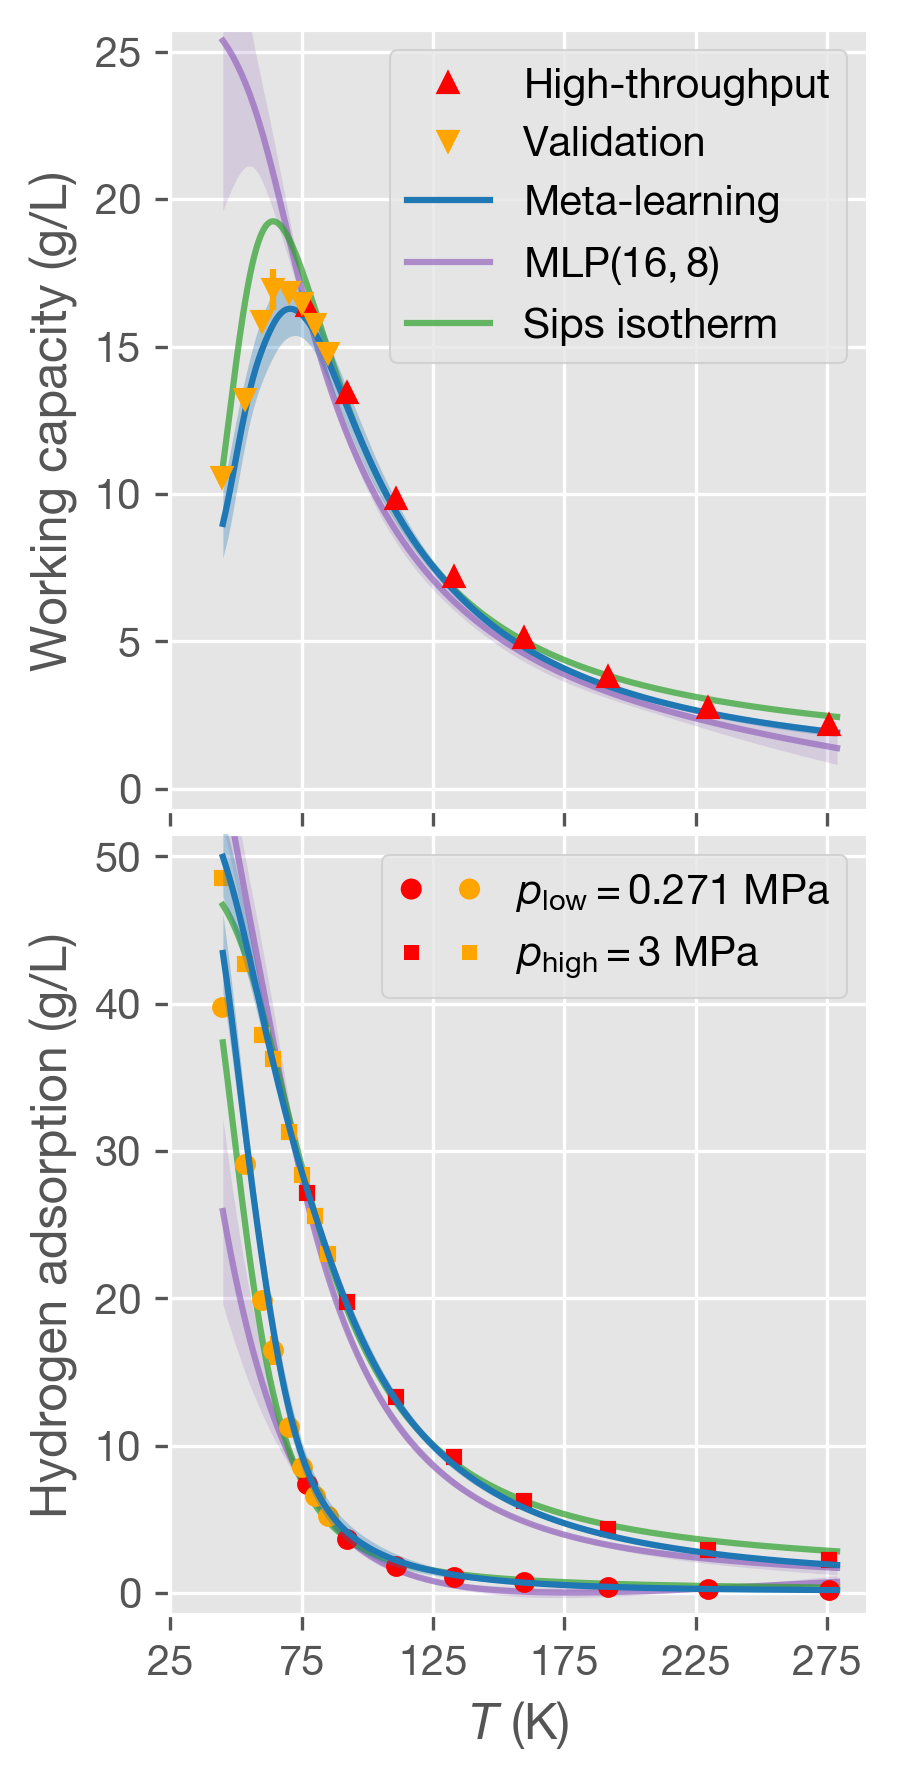

In [6]:
eos = lambda p, T: p * 2.0158 / T / 0.08314

def get_capacity(df, key, p0, p1, e):
    R = 0.08314
    df = df.sort_values(by='temperature')
    temps = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 2]
    q0 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 5:7] * 2.0158
    q1 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p1), 5:7] * 2.0158
    capacity = (q1[:, 0] - q0[:, 0]) * (1-e) + e * (eos(p1, temps) - eos(p0, temps))
    capacity_err = (q1[:, 1]**2 + q0[:, 1]**2)**0.5 * (1-e)
    return temps, capacity, capacity_err, q0, q1

z = 'RWY-0'
nn_capacity = np.loadtxt('results/capacity/%s_capacity.txt' % z)
data_init = pd.read_csv('../data/iza/iza_hydrogen.csv', index_col=0)

data_val = pd.read_csv('../data/iza/validated.csv', index_col=0)
data_val = data_val[data_val['temperature'] > 40]

p0 = 2.71
p1 = 30
e = 0.3
nn_capacity[:, 3:] *= 2.0158 /(1-e)

temps, y_init, y_init_err, q0_init, q1_init = get_capacity(data_init, z, p0, p1, e)
temps_val, y_val, y_val_err, q0_val, q1_val = get_capacity(data_val, z, p0, p1, e)

baseline = np.loadtxt('results/supplementary/RWY-0-mlp.txt')
q1_base = baseline[:, 9:]
q0_base = baseline[:, 1:9]
dn_base = (q1_base - q0_base) * (1 - e) + e * (eos(p1, baseline[:, 0]) - eos(p0, baseline[:, 0]))[..., None]

baseline2 = np.loadtxt('results/supplementary/RWY-0-sips.txt')
q1_base2 = baseline2[:, 9:]
q0_base2 = baseline2[:, 1:9]
dn_base2 = (q1_base2 - q0_base2) * (1 - e) + e * (eos(p1, baseline[:, 0]) - eos(p0, baseline[:, 0]))[..., None]

plt.figure(figsize=(3,7),dpi=300)
plt.subplots_adjust(hspace=0.03)
plt.subplot(211)

line1, _, _ = plt.errorbar(temps, y_init, yerr=y_init_err, marker='^', ls='', color='red', markersize=4.5,zorder=50)
line2, _, _ = plt.errorbar(temps_val, y_val, yerr=y_val_err, marker='v', ls='', markersize=4.5, color='orange',zorder=60)
line3 = plt.plot(nn_capacity[:, 0], nn_capacity[:, 1], color='tab:blue', zorder=50)[0]
plt.fill_between(nn_capacity[:, 0], nn_capacity[:, 1]+nn_capacity[:, 2],
                                     nn_capacity[:, 1]-nn_capacity[:, 2], color='tab:blue', alpha=0.3, zorder=40, lw=0)
line4 = plt.plot(baseline[:, 0], np.mean(dn_base, axis=1), color='tab:purple', alpha=0.7)[0]
plt.fill_between(baseline[:, 0], np.mean(dn_base, axis=1)-np.std(dn_base, axis=1),
                                         np.mean(dn_base, axis=1)+np.std(dn_base, axis=1), color='tab:purple', alpha=0.2, lw=0)
line5 = plt.plot(baseline2[:, 0], np.mean(dn_base2, axis=1), color='tab:green', alpha=0.7)[0]
plt.fill_between(baseline2[:, 0], np.mean(dn_base2, axis=1)-np.std(dn_base2, axis=1),
                                         np.mean(dn_base2, axis=1)+np.std(dn_base2, axis=1), color='tab:green', alpha=0.1, lw=0)
plt.xticks([25, 75, 125, 175, 225, 275], labels=[])
plt.xlabel('')

plt.ylabel('Working capacity (g/L)')
plt.ylim([-0.75, 25.75])
plt.legend([line1, line2, line3, line4, line5], 
           ['High-throughput', 'Validation', 'Meta-learning', 'MLP$(16,8)$', 'Sips isotherm'])
plt.subplot(212)

line1, _, _ = plt.errorbar(temps, q1_init[:, 0], yerr=q1_init[:, 1], marker='s', markersize=3, ls='', color='red')
line2, _, _ = plt.errorbar(temps, q0_init[:, 0], yerr=q0_init[:, 1], marker='o', markersize=4, ls='', color='red')
line3, _, _ = plt.errorbar(temps_val, q1_val[:, 0], yerr=q1_val[:, 1], marker='s', markersize=3, ls='', color='orange')
line4, _, _ = plt.errorbar(temps_val, q0_val[:, 0], yerr=q0_val[:, 1], marker='o', markersize=4, ls='', color='orange')
plt.plot(nn_capacity[:, 0], nn_capacity[:, 3], color='tab:blue', zorder=50)
plt.fill_between(nn_capacity[:, 0], nn_capacity[:, 3]+
                 nn_capacity[:, 4],nn_capacity[:, 3]-nn_capacity[:, 4], color='tab:blue', alpha=0.3, zorder=40, lw=0)
plt.plot(nn_capacity[:, 0], nn_capacity[:, 5], color='tab:blue', zorder=50)
plt.fill_between(nn_capacity[:, 0], nn_capacity[:, 5]+nn_capacity[:, 6],nn_capacity[:, 5]-nn_capacity[:, 6], 
                         color='tab:blue', alpha=0.3, zorder=40, lw=0)

plt.plot(baseline[:, 0], np.mean(q0_base, axis=1), color='tab:purple', alpha=0.7)
plt.fill_between(baseline[:, 0], np.mean(q0_base, axis=1)-np.std(q0_base, axis=1),
                                         np.mean(q0_base, axis=1)+np.std(q0_base, axis=1), color='tab:purple', alpha=0.2, lw=0)
plt.plot(baseline[:, 0], np.mean(q1_base, axis=1), color='tab:purple', alpha=0.7)
plt.fill_between(baseline[:, 0], np.mean(q1_base, axis=1)-np.std(q1_base, axis=1),
                                         np.mean(q1_base, axis=1)+np.std(q1_base, axis=1), color='tab:purple', alpha=0.2, lw=0)

plt.plot(baseline2[:, 0], np.mean(q0_base2, axis=1), color='tab:green', alpha=0.7)
plt.fill_between(baseline2[:, 0], np.mean(q0_base2, axis=1)-np.std(q0_base2, axis=1),
                                         np.mean(q0_base2, axis=1)+np.std(q0_base2, axis=1), color='tab:green', alpha=0.1, lw=0)
plt.plot(baseline2[:, 0], np.mean(q1_base2, axis=1), color='tab:green', alpha=0.7)
plt.fill_between(baseline2[:, 0], np.mean(q1_base2, axis=1)-np.std(q1_base2, axis=1),
                                         np.mean(q1_base2, axis=1)+np.std(q1_base2, axis=1), color='tab:green', alpha=0.1, lw=0)
# plot legend with multiple symbols
import matplotlib.collections as collections
import matplotlib

circles = collections.CircleCollection([20, 20], 
                facecolor=[matplotlib.colors.to_rgba('red'), 
                           matplotlib.colors.to_rgba('orange')
                           ])
squares = collections.RegularPolyCollection(4, np.pi/4, sizes=[20, 20], 
                facecolor=[matplotlib.colors.to_rgba('red'), 
                           matplotlib.colors.to_rgba('orange')
                           ])
plt.legend([circles, squares], ['$p_\mathrm{low}=0.271$ MPa', '$p_\mathrm{high}=3$ MPa'],
           scatterpoints=2, scatteryoffsets=[.5], handlelength=2)
plt.ylim([-1.5, 51.5])
plt.xticks([25, 75, 125, 175, 225, 275])
plt.ylabel('Hydrogen adsorption (g/L)')
plt.xlabel('$T$ (K)')
#plt.savefig('figure-5.pdf', bbox_inches='tight')
plt.show()


## Figure 6

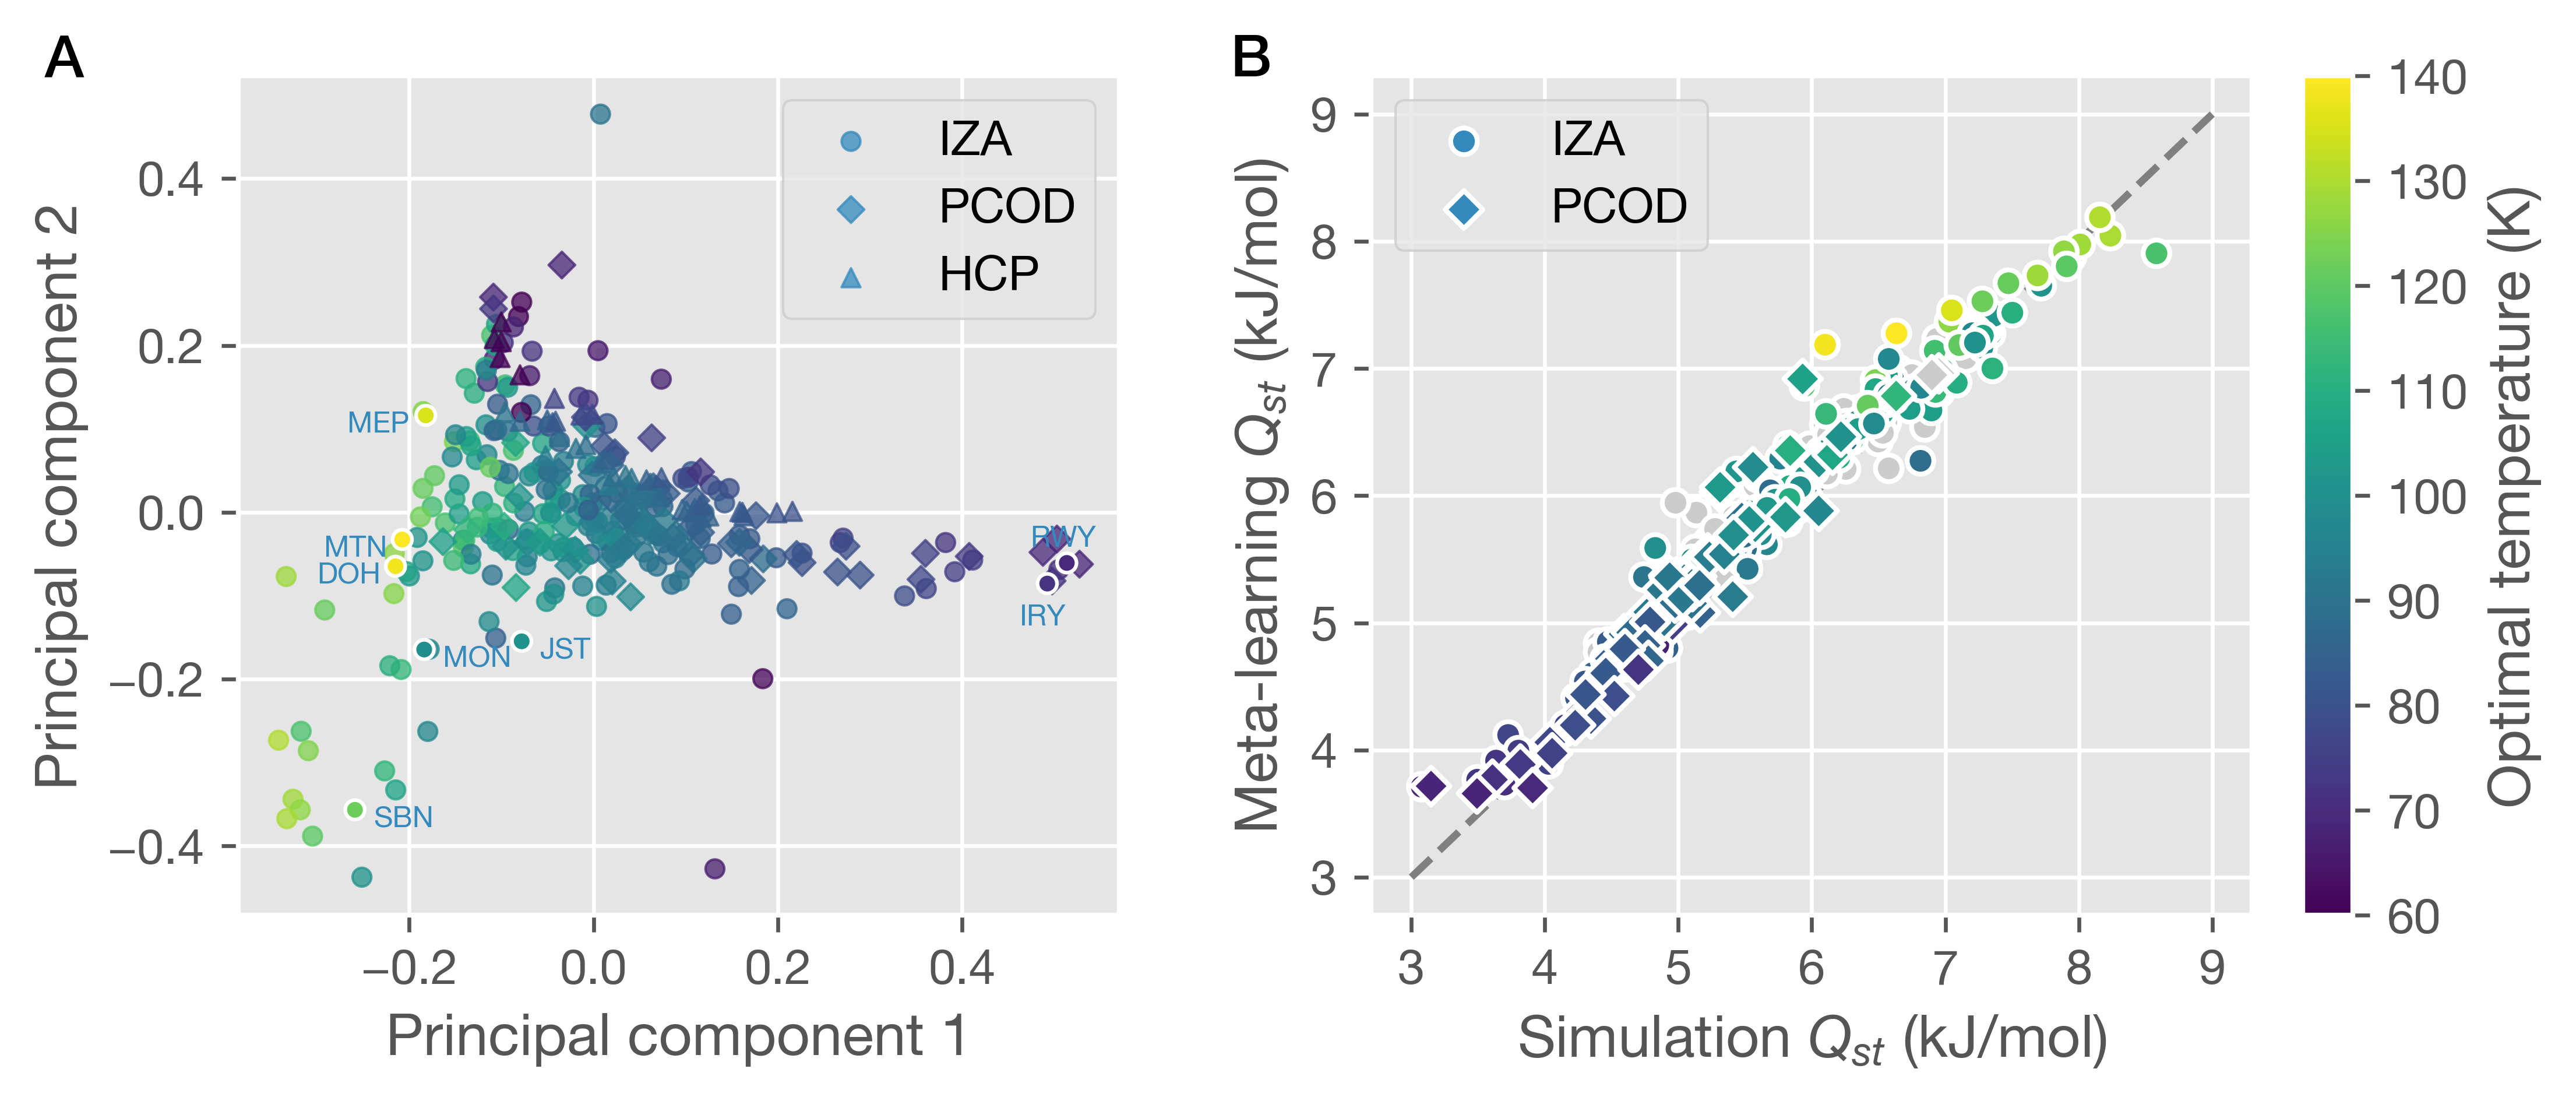

In [7]:
# PCA 
from sklearn.decomposition import PCA

fingerprint_files = ['results/%s/nn-regular.csv' % x for x in \
            ['iza', 'pcod', 'hcp', 'mof']] 
name_files = ['../data/%s/names.csv' % x for x in \
            ['iza', 'pcod', 'hcp', 'mof']] 

model = PCA(n_components=2)
z_all = np.vstack([np.loadtxt(x, delimiter=',')[:, :-1] for x in fingerprint_files[:3]])
keys_all = [np.genfromtxt(name_files[i], dtype=str) for i in range(3)]

fig  = plt.figure()
fig.set_size_inches((7.2, 3))
fig.set_dpi(600)


z_pc_all = model.fit_transform(z_all)

xoffsets = [-0.04, -0.03, 0.02, 0.02, 0.02, -0.085, -0.085, -0.085]
yoffsets = [0.02, -0.05, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02]


p = 0
lines = []
axes = []
ax = fig.add_axes((0.1, 0.1, 0.35, 0.8))
axes.append(ax)
for i, df in enumerate([df_iza, df_pcod, df_hcp]):
    keys = keys_all[i]
    t_all = np.vstack([df['Optimal temperature (K)'].loc[df['Zeolite'].astype(str) == key].values for key in keys]).ravel()
    n_tank_all = np.vstack([df['Tank capacity (mol)'].loc[df['Zeolite'].astype(str) == key].values for key in keys]).ravel()
    n_ex_all = np.vstack([df['Excess capacity (mol)'].loc[df['Zeolite'].astype(str) == key].values for key in keys]).ravel()
    z_pc = z_pc_all[p : p + len(keys)]
    p += len(keys)
    cmaps = ['viridis', 'plasma']
    labels = ['Optimal temperature (K)', 'Deliverable capacity (g/L)']
    #cs = n_tank_all / (eos(30, t_all) - eos(2.71, t_all))
    cs = t_all
    if i == 0:
        norm = plt.Normalize(60, 140)
    plot = ax.scatter(z_pc[:, 0], z_pc[:, 1], c=cs, s=15, 
                      norm=norm, alpha=0.75, marker=markers[i], cmap='viridis')
    lines.append(plot)
    if i == 0:
        #fig.colorbar(plot, ax=ax, label='Optimal temperature (K)')
        mask = np.isin(keys, validated)
        ax.scatter(z_pc[mask, 0], z_pc[mask, 1], c=cs[mask], linewidth=0.75, s=16, 
                   edgecolor='1', norm=norm, alpha=1, marker=markers[i], cmap='viridis', zorder=30)  
        for k in np.where(mask)[0]:
            h = validated.index(keys[k])
            ax.text(z_pc[k, 0] + xoffsets[h], z_pc[k, 1] + yoffsets[h], keys[k][:-2], 
                    fontsize=6, color=c1)
    ax.set_xlabel('Principal component 1')
    ax.set_ylabel('Principal component 2')
ax.legend(lines, ["IZA", "PCOD", "HCP"])

ax = fig.add_axes((0.55, 0.1, 0.35, 0.8))
axes.append(ax)
paths = ['results/iza', 'results/pcod']
df_list = [df_iza, df_pcod]
pid = 1
tid = 1
key = 'P%d-T%d' % (pid, tid)
plots = []
norm = plt.Normalize(60, 140)
for i in range(2):
    heat_sim = np.load("%s/heat-sim.npy" % paths[i]) 
    df = pd.read_csv('%s/heat-%s-ml.csv'% (paths[i], key), dtype={'Zeolite': str}, index_col=0)
    df = df.merge(df_list[i], on="Zeolite").sort_values("Zeolite")
    df["q_st"] = heat_sim[:, pid, tid, 0]
    mask = df['Excess capacity (mol)'] <= 0
    plt.scatter(-df['q_st'].loc[mask], df.loc[mask, df.columns.str.startswith("Heat of adsorption (")],
                color='0.8', linewidth=1, s=30, edgecolor='1', marker=markers[i], zorder=20)
    mask = df['Excess capacity (mol)'] > 0
    plots.append(plt.scatter(-df['q_st'].loc[mask], df.loc[mask, df.columns.str.startswith("Heat of adsorption (")],
                c=df['Optimal temperature (K)'].loc[mask], 
                             linewidth=1, s=30, edgecolor='1', marker=markers[i], zorder=20, norm=norm))
cax = fig.add_axes((0.92, 0.1, 0.02, 0.8))
fig.colorbar(plots[1], cax=cax, label='Optimal temperature (K)')
ax.set_xlabel("Simulation $Q_{st}$ (kJ/mol)")
ax.set_ylabel("Meta-learning $Q_{st}$ (kJ/mol)")
ax.set_xticks([3,4,5,6,7,8,9])
ax.set_yticks([3,4,5,6,7,8,9])
ax.legend(plots, ['IZA', 'PCOD'])
ax.plot([3, 9], [3, 9], color="0.5", ls='--')
plt.text(-0.22, 1, "A", transform=axes[0].transAxes, fontsize=12, fontweight=600)
plt.text(-0.16, 1, "B", transform=axes[1].transAxes, fontsize=12, fontweight=600)

#plt.savefig('figure-6.pdf', format='pdf', bbox_inches='tight')
plt.show()

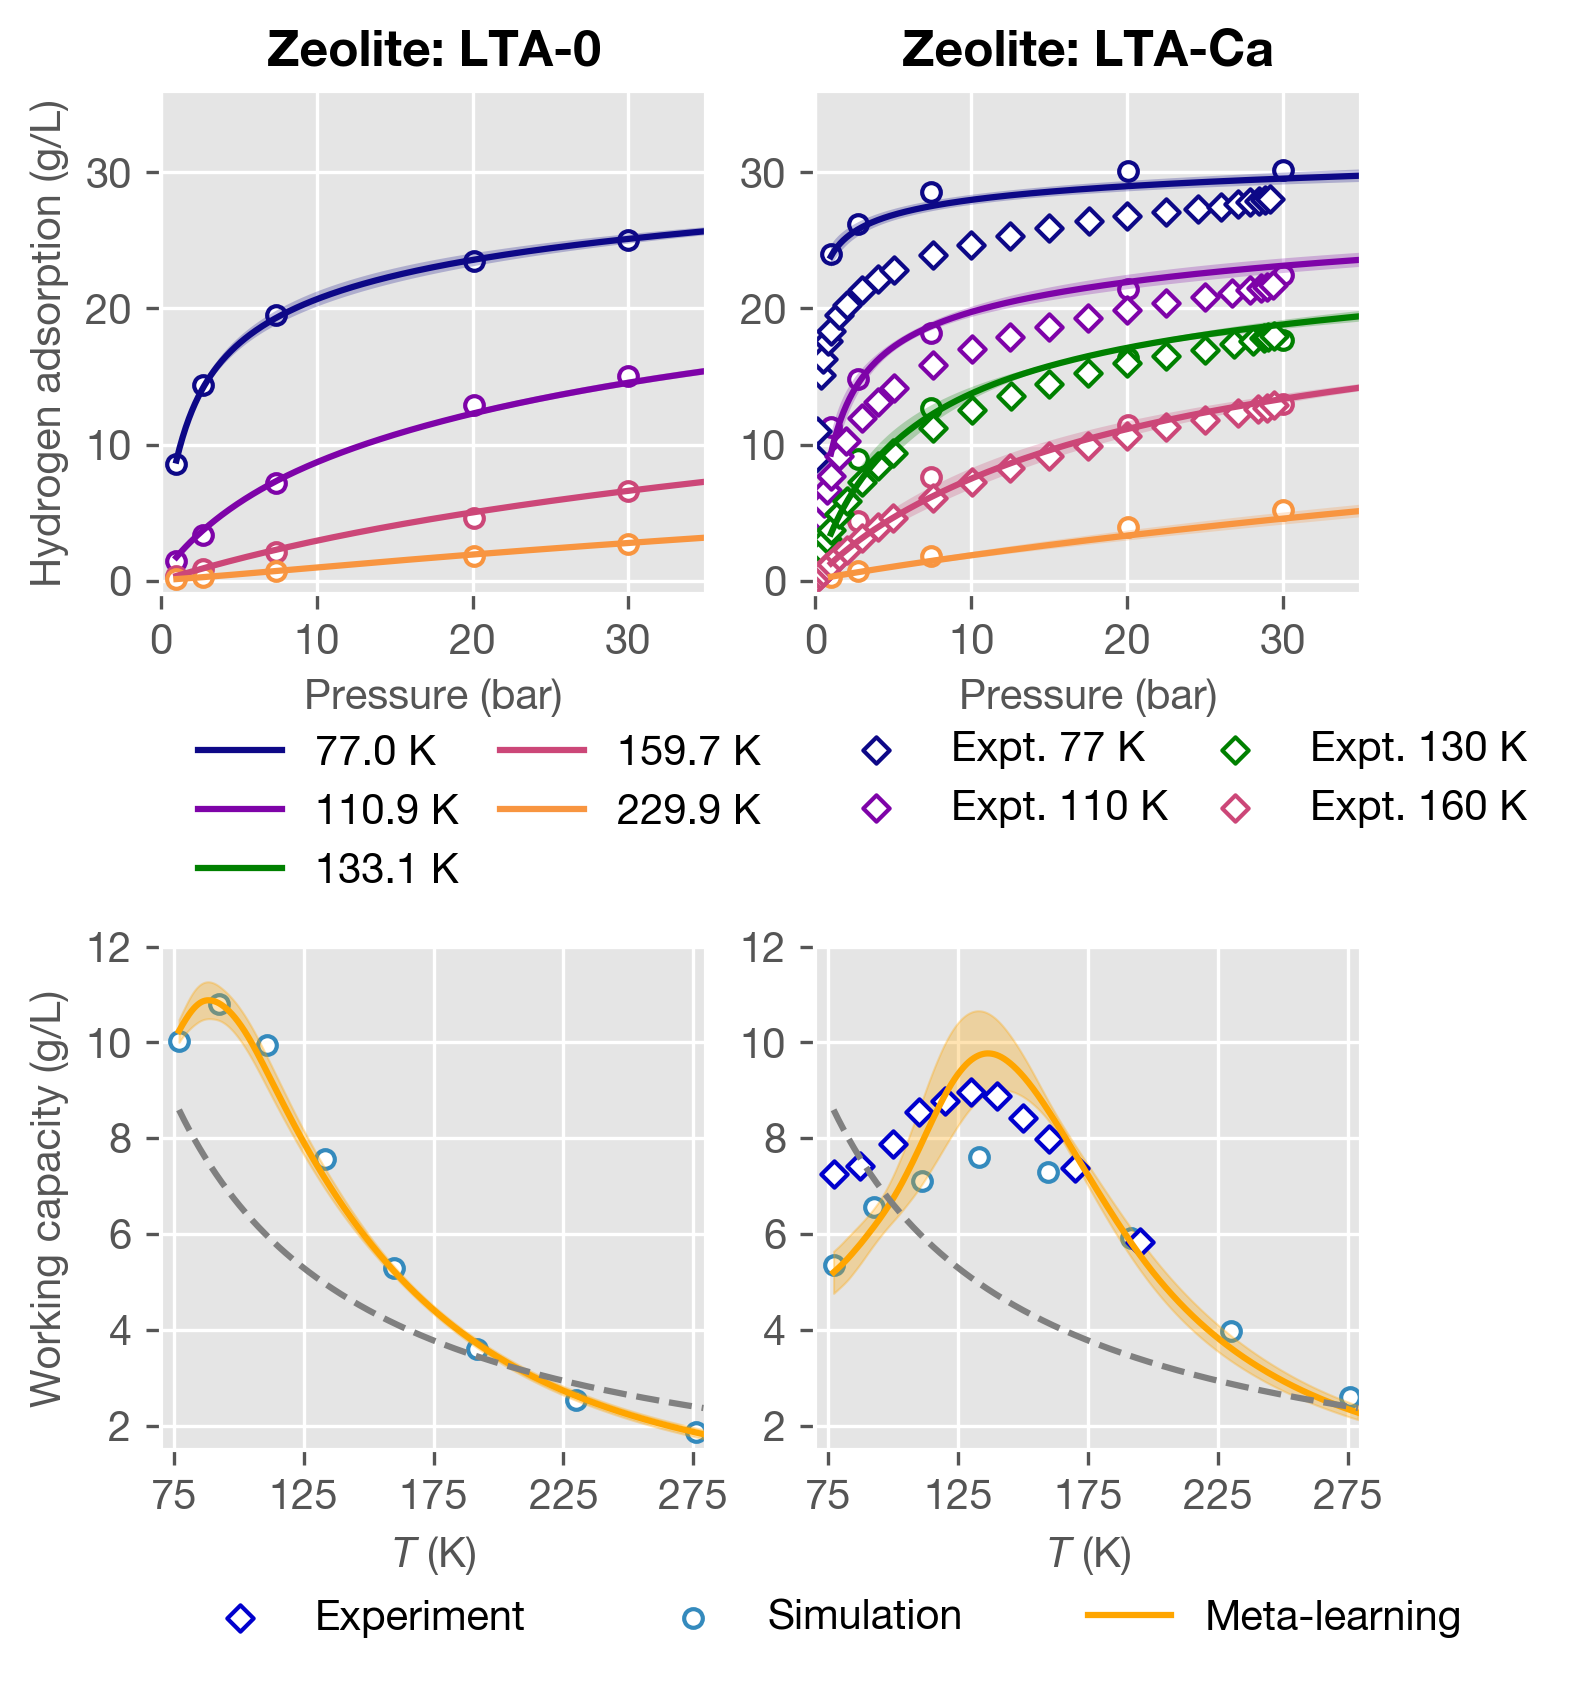

In [9]:
eos = lambda p, T: p * 2.0158 / T / 0.08314
def get_capacity(df, key, p0, p1, e):
    R = 0.08314
    if '-' not in key:
        key += '-0'
    df = df.sort_values(by='temperature')
    temps = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 2]
    q0 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p0), 5:7]
    q1 = df.values[np.logical_and(df['zeolite'] == key, df['pressure'] == p1), 5:7]
    capacity = ((q1[:, 0] - q0[:, 0]) * (1-e) + e * (p1 - p0) / R / temps) * 2.0158
    capacity_err = (q1[:, 1]**2 + q0[:, 1]**2)**0.5 * (1-e) * 2.0158
    return temps, capacity, capacity_err

data = pd.read_csv('../data/iza/iza_hydrogen.csv', index_col=0)
data_lta = pd.read_csv('../data/cation-exchange/LTA-sim.csv', index_col=0)
data = pd.concat([data, data_lta], axis=0)
temperatures = [77.0, 110.88, 133.06, 159.67, 229.92]
pressures = np.array([1.0, 2.71, 7.39, 20.09, 30.0, 54.60, 148.4, 403.4])
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(4,6)
fig.set_dpi(300)
#fig = plt.figure(figsize=(6.4,4.8),dpi=300)
cmap = matplotlib.cm.get_cmap('plasma', 9)
colors = cmap(range(12))[::2]
plt.subplots_adjust(wspace=0.2, hspace=0.7, left=0, right=1)
axes[0, 0].set_ylabel('Hydrogen adsorption (g/L)',fontsize=10)
axes[1, 0].set_ylabel('Working capacity (g/L)', fontsize=10)
lines_top = []
lines_bottom = []

colors_fig7 = colors[:2].tolist() + ["green"] + colors[2:4].tolist()


for j, key in enumerate(['LTA-0', 'LTA-Ca']):
    ax = axes[0, j]
    ax.set_title("Zeolite: %s" % key, fontsize=12, fontweight="bold")
    data_pred = np.loadtxt('results/isotherms/%s.txt' % key)
    for i, zipped in enumerate(zip(colors_fig7, temperatures)):
        if j == 0 and i == 2:
            continue
        if j == 0 and i > 2:
            i -= 1
        c, temp = zipped
        loadings = data.loc[np.logical_and(
                data['zeolite'] == key, 
                data['temperature'] == temp)].sort_values('pressure')['loading (v)'].values
        ax.scatter(pressures, loadings * 2.0158, 
                color='1', linewidth=1, edgecolors=c, s=20)
        y_pred = data_pred[:, 1 + 2*i] * 2.0158
        y_err = data_pred[:, 2 + 2*i] * 2.0158
        line = ax.plot(data_pred[:, 0], y_pred, color=c)[0]
        if j == 1:
            lines_top.append(line)
        ax.fill_between(data_pred[:, 0], y_pred - y_err, y_pred + y_err, color=c, alpha=0.25, lw=0)

    ax.set_xlabel('Pressure (bar)',fontsize=10)
    ax.set_xlim([-20, 420])
    ax = axes[1, j]
    temps, y_init, y_init_err = get_capacity(data, key, 2.71, 30, 0.3)
    data_pred = np.loadtxt('results/capacity/%s_capacity.txt' % key)
    n_h2 = eos(30, data_pred[:, 0]) - eos(2.71, data_pred[:, 0])
    line1 = ax.scatter(temps, y_init, marker='o', 
                              color='1', linewidth=1, edgecolors=c1, s=20)
    line3 = ax.plot(data_pred[:, 0], data_pred[:, 1], color='orange')[0]
    
    ax.fill_between(data_pred[:, 0], data_pred[:, 1]+data_pred[:, 2],data_pred[:, 1]-data_pred[:, 2], color='orange', alpha=0.3)
    ax.plot(data_pred[:, 0], n_h2, color="0.5", ls='--')
    ax.set_xlabel('$T$ (K)', fontsize=10)
    
for a in axes[0, :]:
    a.set_ylim([-1, 36])
    a.set_xlim([0, 35])

for a in axes[1, :]:
    a.set_xticks([75, 125, 175, 225, 275])
    a.set_xlim([70, 280])
    a.set_ylim([1.5, 12])
    
isotherms_exp = np.load("experimental/LTA-Ca-isotherm-abs.npy", allow_pickle=True)
exp1 = axes[0][1].scatter(isotherms_exp[0][:, 0], isotherms_exp[0][:, 1], marker='D', 
                              color='1', linewidth=1, edgecolors=colors[0], s=20)
exp2 = axes[0][1].scatter(isotherms_exp[3][:, 0], isotherms_exp[3][:, 1], marker='D', 
                              color='1', linewidth=1, edgecolors=colors[1], s=20)
exp3 = axes[0][1].scatter(isotherms_exp[5][:, 0], isotherms_exp[5][:, 1], marker='D', 
                              color='1', linewidth=1, edgecolors='green', s=20)
exp4 = axes[0][1].scatter(isotherms_exp[8][:, 0], isotherms_exp[8][:, 1], marker='D', 
                              color='1', linewidth=1, edgecolors=colors[2], s=20)

t_isotherm = [77, 110, 130, 160]
ind_isotherm = [0, 3, 5, 8]
#for i in range(4):
#    np.savetxt("isotherm_exp_%dK.txt" % t_isotherm[i], isotherms_exp[ind_isotherm[i]])
                          
n_exp = np.loadtxt('experimental/LTA-Ca-optimal-temp.npy')
line4 = axes[1][1].scatter(n_exp[:, 0], n_exp[:, 1], marker='D', 
                              color='1', linewidth=1, edgecolors='mediumblue', s=20)

    
    
fig.legend(lines_top, ["%.1f K" % x for x in temperatures], 
           loc='lower left', bbox_to_anchor=(0, 0.415), ncol=2, 
           frameon=False, columnspacing=1)
fig.legend([exp1, exp2, exp3, exp4], ['Expt. 77 K', 'Expt. 110 K', 'Expt. 130 K', 'Expt. 160 K'], 
           loc='lower left', bbox_to_anchor=(0.53, 0.45), ncol=2, 
           frameon=False, columnspacing=0.6)
fig.legend([line4, line1, line3], 
           ['Experiment', 'Simulation','Meta-learning'], 
           loc='lower left', bbox_to_anchor=(0, 0), ncol=5,
           frameon=False, columnspacing=3)
#plt.savefig('figure-7.pdf', format='pdf', bbox_inches='tight')
plt.show()
